In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)

0it [00:00, ?it/s]

 99%|█████████▉| 9846784/9912422 [00:23<00:00, 342718.53it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:01<?, ?it/s]
32768it [00:01, 27157.76it/s]            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz



 99%|█████████▉| 1630208/1648877 [00:06<00:00, 1179542.26it/s]

0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 14023.70it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

9920512it [00:40, 342718.53it/s]                             

In [4]:
from torch.utils.data import DataLoader, Dataset, TensorDataset

In [5]:
dl = DataLoader(data)

In [6]:
dt = dl.dataset.data

In [7]:
dt.shape

torch.Size([60000, 28, 28])

In [8]:
a = torch.zeros([128,128],dtype=torch.float)

In [9]:
a[10:38,10:38]+=dt[10,:,:].float()


1654784it [00:24, 1179542.26it/s]                             

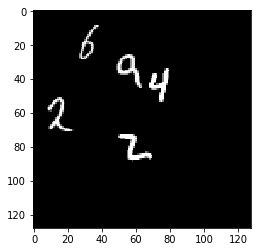

In [31]:
num_digits = 5#np.random.randint(5)
indices = np.random.randint(60000,size=(num_digits))
a = torch.zeros(128,128)
for i in indices:
    x = np.random.randint(70)
    y = np.random.randint(70)
    a[x:x+28,y:y+28] += dt[i,:,:].float()
plt.imshow(a,cmap="gray")

In [53]:
num_samples = 6000
training = []
for ind in range(num_samples):
    num_digits = 5#np.random.randint(11)
    indices = np.random.randint(60000,size=(num_digits))
    a = torch.zeros(128,128)
    for i in indices:
        x = np.random.randint(70)
        y = np.random.randint(70)
        a[x:x+28,y:y+28]+=dt[i,:,:].float()
    training.append(a)
training = torch.stack(training, dim=0).squeeze().view(-1, 1, 128, 128)
torch.save(training, './training.pt')

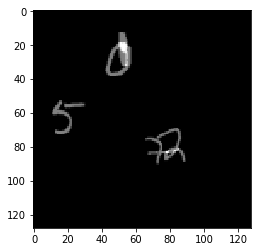

In [58]:
plt.imshow(training[100,0,:,:],cmap="gray")